In [28]:
import pandas as pd
import nltk as nl
import numpy as np

df= pd.read_csv("Sentiment.csv")
df.describe

<bound method NDFrame.describe of           id               candidate  candidate_confidence relevant_yn  \
0          1  No candidate mentioned                1.0000         yes   
1          2            Scott Walker                1.0000         yes   
2          3  No candidate mentioned                1.0000         yes   
3          4  No candidate mentioned                1.0000         yes   
4          5            Donald Trump                1.0000         yes   
...      ...                     ...                   ...         ...   
13866  13867  No candidate mentioned                1.0000         yes   
13867  13868           Mike Huckabee                0.9611         yes   
13868  13869                Ted Cruz                1.0000         yes   
13869  13870            Donald Trump                1.0000         yes   
13870  13871                Ted Cruz                0.9242         yes   

       relevant_yn_confidence sentiment  sentiment_confidence  \
0           

In [29]:
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [30]:

df.columns

Index(['id', 'candidate', 'candidate_confidence', 'relevant_yn',
       'relevant_yn_confidence', 'sentiment', 'sentiment_confidence',
       'subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name',
       'relevant_yn_gold', 'retweet_count', 'sentiment_gold',
       'subject_matter_gold', 'text', 'tweet_coord', 'tweet_created',
       'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

**Handling NAN variable**

In [32]:
df.fillna(0,inplace=True ,axis=1)

In [33]:
df.dropna()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6578,None of the above,1.0000,0,...,0,5,0,0,RT @NancyLeeGrahn: How did everyone feel about...,0,2015-08-07 09:54:46 -0700,629697200650592256,0,Quito
1,2,Scott Walker,1.0000,yes,1.0000,Positive,0.6333,None of the above,1.0000,0,...,0,26,0,0,RT @ScottWalker: Didn't catch the full #GOPdeb...,0,2015-08-07 09:54:46 -0700,629697199560069120,0,0
2,3,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6629,None of the above,0.6629,0,...,0,27,0,0,RT @TJMShow: No mention of Tamir Rice and the ...,0,2015-08-07 09:54:46 -0700,629697199312482304,0,0
3,4,No candidate mentioned,1.0000,yes,1.0000,Positive,1.0000,None of the above,0.7039,0,...,0,138,0,0,RT @RobGeorge: That Carly Fiorina is trending ...,0,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0000,yes,1.0000,Positive,0.7045,None of the above,1.0000,0,...,0,156,0,0,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,0,2015-08-07 09:54:45 -0700,629697196967903232,0,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,13867,No candidate mentioned,1.0000,yes,1.0000,Negative,0.7991,Abortion,0.6014,No candidate mentioned,...,yes,7,Negative,Abortion\nWomen's Issues (not abortion though),RT @cappy_yarbrough: Love to see men who will ...,0,2015-08-07 09:29:43 -0700,629690895479250944,Como,0
13867,13868,Mike Huckabee,0.9611,yes,1.0000,Positive,0.7302,None of the above,0.9229,Mike Huckabee,...,yes,1,0,0,RT @georgehenryw: Who thought Huckabee exceede...,0,2015-08-07 09:25:02 -0700,629689719056568320,USA,0
13868,13869,Ted Cruz,1.0000,yes,1.0000,Positive,0.8051,None of the above,0.9647,Ted Cruz,...,yes,67,Positive\nNeutral,0,"RT @Lrihendry: #TedCruz As President, I will a...",0,2015-08-07 07:19:18 -0700,629658075784282112,0,0
13869,13870,Donald Trump,1.0000,yes,1.0000,Negative,1.0000,Women's Issues (not abortion though),0.9202,Donald Trump,...,yes,149,0,Women's Issues (not abortion though),RT @JRehling: #GOPDebate Donald Trump says tha...,0,2015-08-07 09:54:04 -0700,629697023663546368,0,0


In [34]:
rmv_items=['tweet_id','subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name','relevant_yn_gold','tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone' ,'subject_matter_gold']
df =df.drop(['tweet_id','subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name','relevant_yn_gold','tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone' ,'subject_matter_gold'], axis=1)


In [35]:
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,retweet_count,sentiment_gold,text
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,5,0,RT @NancyLeeGrahn: How did everyone feel about...
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,26,0,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,27,0,RT @TJMShow: No mention of Tamir Rice and the ...
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,138,0,RT @RobGeorge: That Carly Fiorina is trending ...
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,156,0,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [36]:
!pip install wordcloud

In [37]:
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [38]:
stopwords_set = set(stopwords.words("english"))

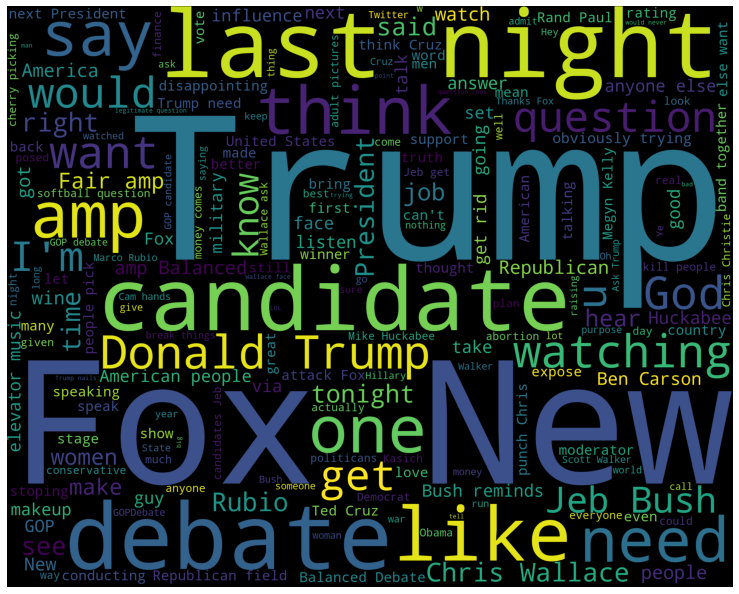

In [39]:
def wordcloud_draw(df):
    words = ' '.join(df)
    cleaned_word = " ".join([word for word in words.split()if 'http' not in word and not word.startswith('@')and not word.startswith('#')and word != 'RT'])
    wordcloud = WordCloud(stopwords=stopwords_set,width=2500,height=2000).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
wordcloud_draw(df['text'])

**Text Cleaning**

In [40]:
import re
for i in range(len(df['text'])):
    review=re.sub('[^a-zA-Z]',' ',df['text'][i])
    review=review.lower()
    df['text'][i]=review

C:\Users\pikal\AppData\Local\Temp\ipykernel_22380\524915976.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i]=review


**Lemmatizing**

In [41]:
## lemmatizing
lemmatizer=WordNetLemmatizer()
df['text'] = [lemmatizer.lemmatize(word) for word in df['text'] if not word in set(stopwords.words('english'))]
x=df['text']

In [48]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=25)
X = cv.fit_transform(x).toarray()   

In [56]:
X.shap

array([0.79008707, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.31694143, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.35082734, 0.        , 0.        , 0.39016756,
       0.        , 0.        , 0.        , 0.        , 0.        ])

**Test and train split of data**

In [57]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'sentiment' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['sentiment']]).toarray())


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size = 0.20, random_state = 0)

In [59]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.5544124 ],
       [0.        , 0.        , 0.39380285, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.49461571, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.55303777, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

**MODEL**

In [60]:
from sklearn.naive_bayes import MultinomialNB
s = MultinomialNB().fit(X_train, y_train)

In [63]:
print('Accuracy of MultinomialNB on training set: {:.2f}'.format(s.score(X_train, y_train)))
print('Accuracy of MultinomialNB on test set: {:.2f}'.format(s.score(X_test, y_test)))

Accuracy of SV Classifier on training set: 0.62
Accuracy of SV Classifier on test set: 0.61
